In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import RandomFlip
from tensorflow.keras.layers import RandomRotation
from tensorflow.keras.layers import RandomZoom
from tensorflow.keras.layers import RandomTranslation
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Model

from tensorflow.keras.losses import sparse_categorical_crossentropy

from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from tensorflow.keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator

import pickle

from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Resizing
from keras.utils import to_categorical

from tensorflow.image import resize


from tensorflow.config import list_physical_devices
from tensorflow import device
import mlflow
import mlflow.keras

In [4]:
list_physical_devices('GPU')

2023-09-03 19:36:08.825954: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-03 19:36:08.980950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-09-03 19:36:08.981283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Import file

In [5]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [6]:
y_train = train["label"]
X_train = train.drop("label",axis= 1) / 255
X_test = test /255

In [7]:
X_t = train[:30000].drop("label",axis= 1) / 255
y_t = train[:30000]["label"]
X_tst = train[30000:].drop("label",axis= 1)/255
y_tst = train[30000:]["label"]

In [8]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_tst

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualize numbers

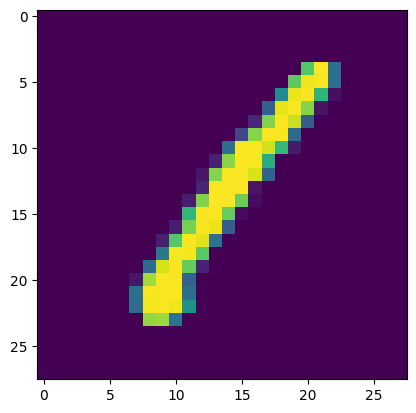

In [10]:
plt.imshow(X_train.loc[0].values.reshape(28,28))

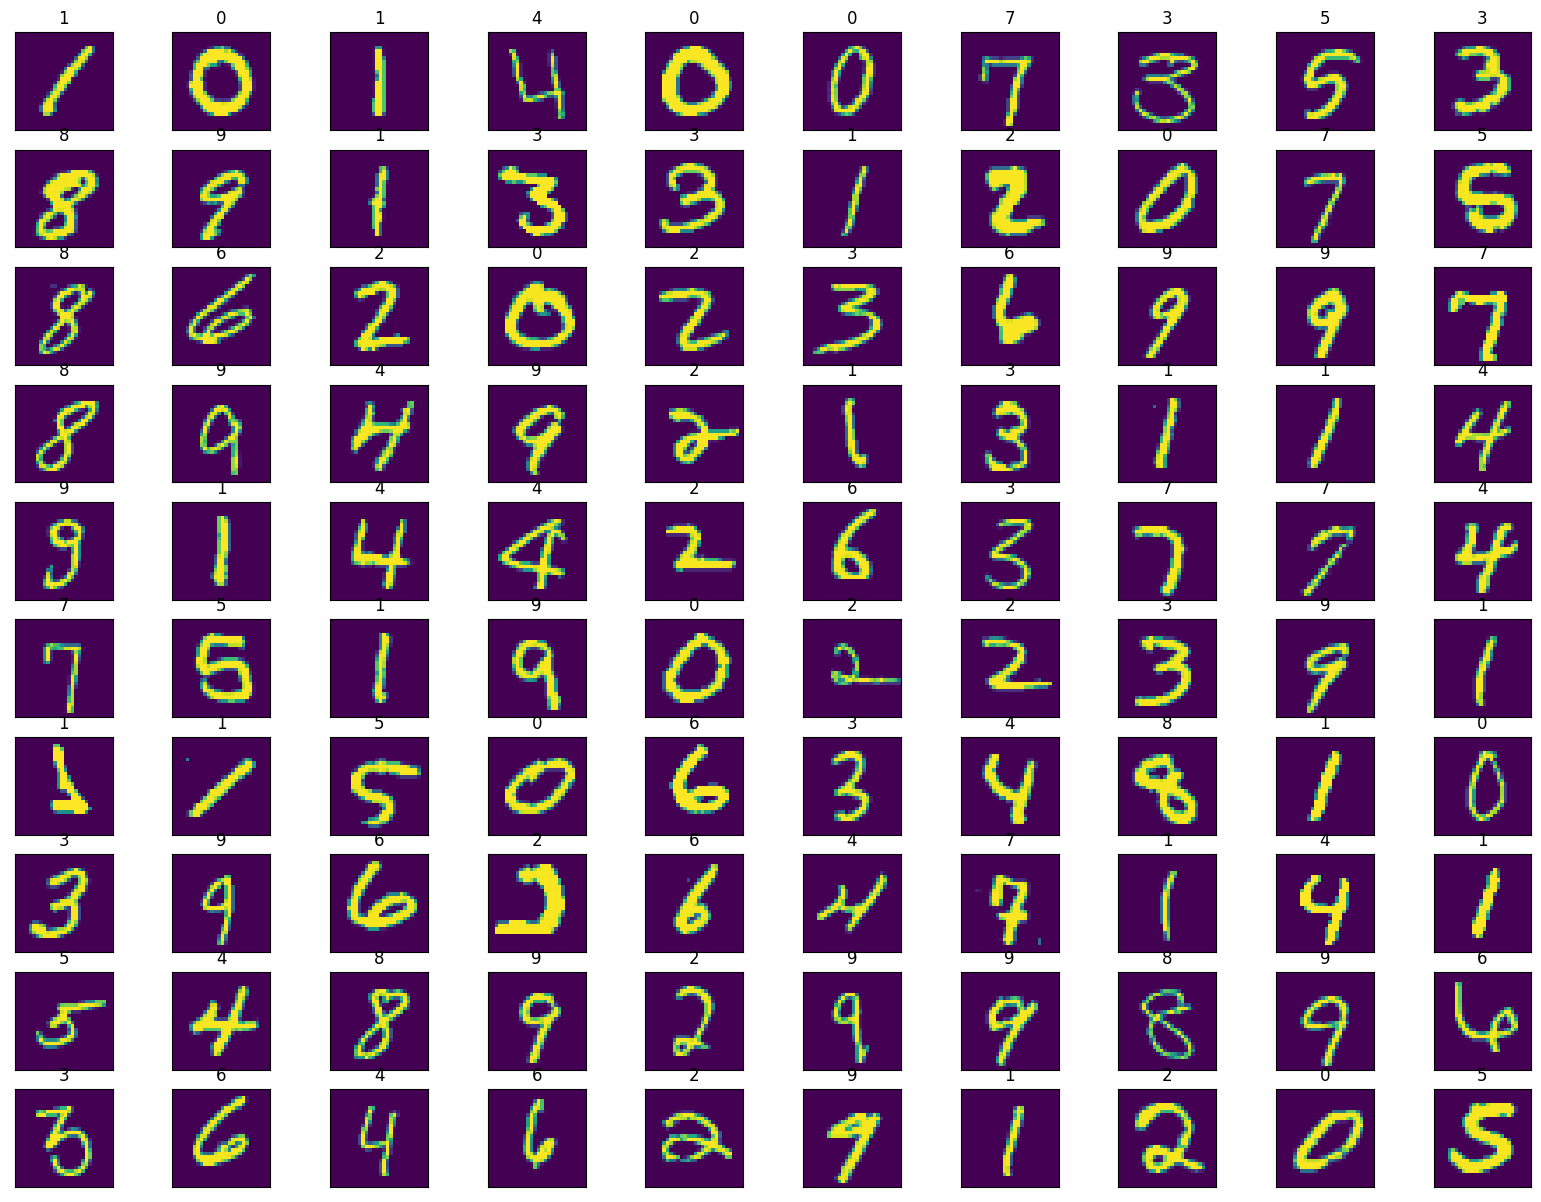

In [11]:
fig, ax = plt.subplots(10, 10, figsize=(20, 15))
for i,ax in enumerate(ax.flat) :
    ax.imshow(X_train.loc[i].values.reshape(28,28))
    ax.set(xticks=[], yticks=[], title= y_train[i])

In [24]:
def learning_curve_dl(history, metric):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history[metric])
    plt.plot(history.history[f"val_{metric}"])
    plt.title(f'model {metric}')
    plt.ylabel(metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
def baseline():
    model = Sequential()
    model.add(Input(784))
    model.add(Dense(10, activation='softmax'))
    return model

def compile_model(model, 
                  X_train, 
                  y_train, 
                  epochs=5, 
                  batch_size=128, 
                  optimizer="adam", 
                  metrics="sparse_categorical_accuracy",
                  loss = 'sparse_categorical_crossentropy'):

    # Compile the model
    model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split= 0.33)

    return history

def pred(X_test,y_test):

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis = 1)
    y_true = y_test.astype(int).tolist() # Returns the indices of the maximum values along an axis.
    #confusion = confusion_matrix(y_true, y_pred_classes)
    print(classification_report(y_true, y_pred_classes))
    return classification_report(y_true, y_pred_classes, output_dict = True)
    
    
def augmented_data(X_train, y_train, number_add_data = 42000):
    # Reshape the input data to 4D tensor with shape (batch_size, rows, columns, channels)
    x_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)

    # Create a data generator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=90,      # randomly rotate the images by up to 10 degrees
        zoom_range=0.3,         # randomly zoom the images by up to 10%
        width_shift_range=0.2,  # randomly shift the images horizontally by up to 10%
        height_shift_range=0.2, # randomly shift the images vertically by up to 10%
        horizontal_flip=True,   # randomly flip the images horizontally
        vertical_flip=False,    # don't randomly flip the images vertically
        fill_mode='nearest'     # fill any empty pixels with the nearest value
    )

    # Fit the data generator to the training data
    datagen.fit(x_train)

    # Generate augmented data

    augmented_data = datagen.flow(x_train, y_train, batch_size= number_add_data)
    
    shape = X_train.shape[0] + number_add_data
    # Concatenate original and augmented data
    x_train_augmented = np.concatenate([x_train, augmented_data[0][0]], axis=0).reshape(shape,784)
    y_train_augmented = np.concatenate([y_train, augmented_data[0][1]], axis=0)
    
    return x_train_augmented, y_train_augmented

def mlflow_create_experiment():
    # Name of the experiment under which all runs should be saved
    experiment_name = "MNIST CNN"

    # Check if the experiment exists. If not, create it.
    experiment = mlflow.get_experiment_by_name(experiment_name)
    if experiment is None:
        experiment_id = mlflow.create_experiment(experiment_name)
    else:
        experiment_id = experiment.experiment_id

    # Set the experiment before starting the run
    mlflow.set_experiment(experiment_name)
    
    return mlflow

def mlflow_metric(history,report, metric):
    # After fitting the model, log metrics
    mlflow.log_metric(metric, history.history[metric][-1])
    mlflow.log_metric(f"val_{metric}", history.history[f"val_{metric}"][-1])

    # Log metrics for each class to MLflow
    for label, metrics in report.items():
        if label.isdigit():  # Check if the label is a digit (i.e., an actual class label)
            for metric_name, value in metrics.items():
                mlflow.log_metric(f"{metric_name}_{label}", value)

    # If you want to log average values
    for avg, value in report["weighted avg"].items():
        mlflow.log_metric(f"weighted_avg_{avg}", value)
        
    return mlflow

def mlflow_try_run(name):
    try:
        # Tente de démarrer une nouvelle session
        mlflow.start_run(run_name= name)
    except Exception as e:
        print(f"Erreur détectée: {e}. Fin de la session précédente.")
        mlflow.end_run()
        mlflow.start_run(run_name=name)
        
    return mlflow

def mlflow_experiment(report, name, metric, history) :
    
    mlflow = mlflow_create_experiment()
    mflow = mlflow_try_run(name)
    mlflow = mlflow_metric(history,report,metric)
    
    mlflow.end_run()
    
    
def models(X_train,y_train, name,add_data, epochs = 5, batch_size = 128, optimizer = "adam", metric="sparse_categorical_accuracy", loss = "sparse_categorical_crossentropy"):
    X_trains, y_trains = augmented_data(X_train, y_train, number_add_data = add_data)
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_trains, y_trains, test_size=.3, random_state=1)
    history = compile_model(model, 
                      X_train_split, 
                      y_train_split, 
                      epochs= epochs, 
                      batch_size=batch_size, 
                      optimizer=optimizer, 
                      metrics=metric,
                      loss = loss)
    report = pred(X_test_split,y_test_split)
    learning_curve_dl(history,metric)
    mlflow_experiment(report, name, metric, history)

# Model

## Baseline

Epoch 1/5
308/308 [==============================] - 2s 7ms/step - loss: 1.7640 - sparse_categorical_accuracy: 0.4474 - val_loss: 1.6490 - val_sparse_categorical_accuracy: 0.4863
Epoch 2/5
308/308 [==============================] - 2s 6ms/step - loss: 1.6322 - sparse_categorical_accuracy: 0.4913 - val_loss: 1.6296 - val_sparse_categorical_accuracy: 0.4967
Epoch 3/5
308/308 [==============================] - 2s 5ms/step - loss: 1.6121 - sparse_categorical_accuracy: 0.4949 - val_loss: 1.6185 - val_sparse_categorical_accuracy: 0.4973
Epoch 4/5
308/308 [==============================] - 2s 6ms/step - loss: 1.5994 - sparse_categorical_accuracy: 0.4992 - val_loss: 1.6110 - val_sparse_categorical_accuracy: 0.4973
Epoch 5/5
788/788 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.51      0.58      0.54      2553
           1       0.55      0.57      0.56      2788
           2       0.53      0.42      0.47      2517
  

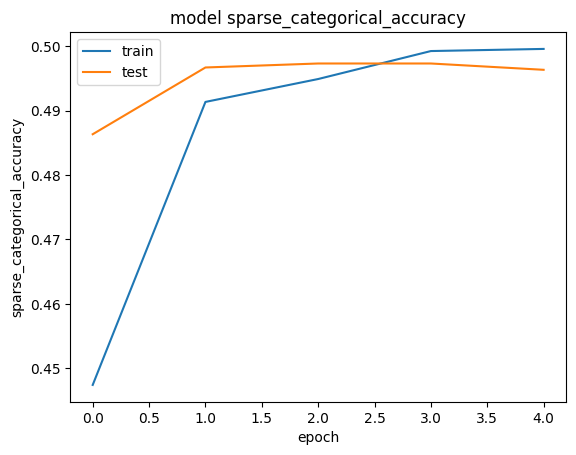

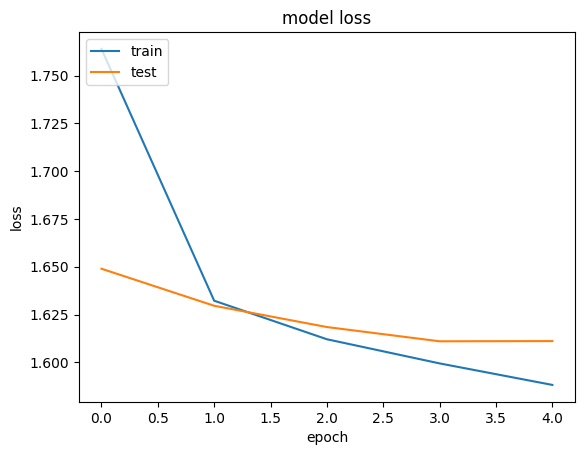

In [23]:
model = baseline()
X_trains, y_trains = augmented_data(X_train, y_train)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_trains, y_trains, test_size=.3, random_state=1)
history = compile_model(model, X_train_split,y_train_split)
pred(X_test_split,y_test_split)
learning_curve_dl(history,"sparse_categorical_accuracy")

# Save model
model.save("data/model_baseline.h5")



## Convolutional

Epoch 1/20
62/62 [==============================] - 1s 9ms/step - loss: 1.4229 - sparse_categorical_accuracy: 0.5763 - val_loss: 1.2091 - val_sparse_categorical_accuracy: 0.6327
Epoch 2/20
62/62 [==============================] - 0s 7ms/step - loss: 1.0954 - sparse_categorical_accuracy: 0.6575 - val_loss: 1.0444 - val_sparse_categorical_accuracy: 0.6737
Epoch 3/20
62/62 [==============================] - 0s 7ms/step - loss: 0.9639 - sparse_categorical_accuracy: 0.6943 - val_loss: 0.9706 - val_sparse_categorical_accuracy: 0.6925
Epoch 4/20
62/62 [==============================] - 0s 7ms/step - loss: 0.8912 - sparse_categorical_accuracy: 0.7168 - val_loss: 0.9361 - val_sparse_categorical_accuracy: 0.7031
Epoch 5/20
62/62 [==============================] - 0s 7ms/step - loss: 0.8488 - sparse_categorical_accuracy: 0.7270 - val_loss: 0.9288 - val_sparse_categorical_accuracy: 0.7045
Epoch 6/20
62/62 [==============================] - 0s 7ms/step - loss: 0.8192 - sparse_categorical_accuracy: 

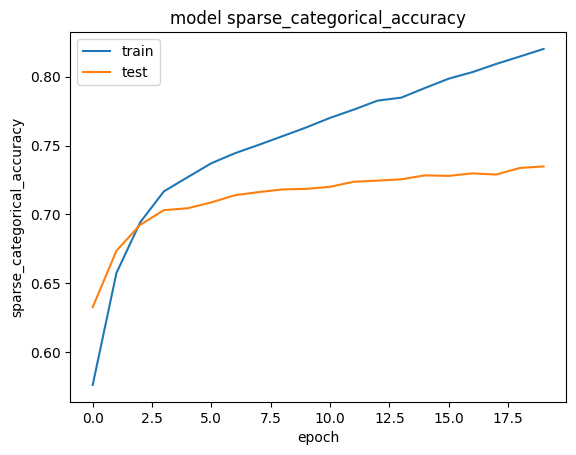

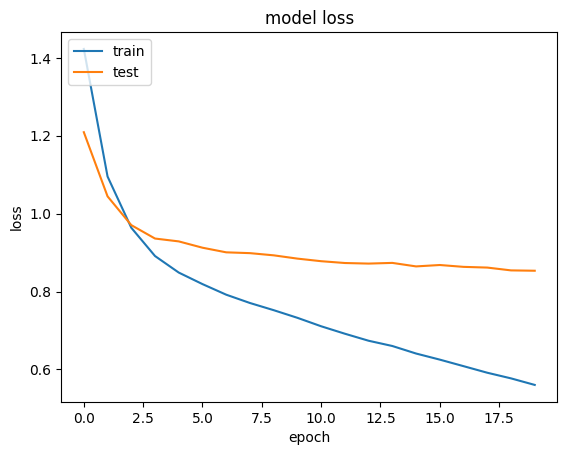

In [25]:
model = Sequential()
model.add(Input(shape=(784,)))  # Input layer
model.add(Reshape((28, 28, 1)))  # Reshaping layer
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1))) 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

models(X_train, y_train, name = "Baseline", add_data = 25000, epochs = 20, batch_size = 512)


Epoch 1/20
62/62 [==============================] - 5s 80ms/step - loss: 1.5725 - sparse_categorical_accuracy: 0.5300 - val_loss: 1.2974 - val_sparse_categorical_accuracy: 0.6073
Epoch 2/20
62/62 [==============================] - 0s 7ms/step - loss: 1.2227 - sparse_categorical_accuracy: 0.6305 - val_loss: 1.1541 - val_sparse_categorical_accuracy: 0.6490
Epoch 3/20
62/62 [==============================] - 0s 8ms/step - loss: 1.0886 - sparse_categorical_accuracy: 0.6641 - val_loss: 1.0477 - val_sparse_categorical_accuracy: 0.6725
Epoch 4/20
62/62 [==============================] - 1s 9ms/step - loss: 0.9944 - sparse_categorical_accuracy: 0.6880 - val_loss: 0.9808 - val_sparse_categorical_accuracy: 0.6915
Epoch 5/20
62/62 [==============================] - 1s 8ms/step - loss: 0.9355 - sparse_categorical_accuracy: 0.7052 - val_loss: 0.9401 - val_sparse_categorical_accuracy: 0.7041
Epoch 6/20
62/62 [==============================] - 0s 7ms/step - loss: 0.8943 - sparse_categorical_accuracy:

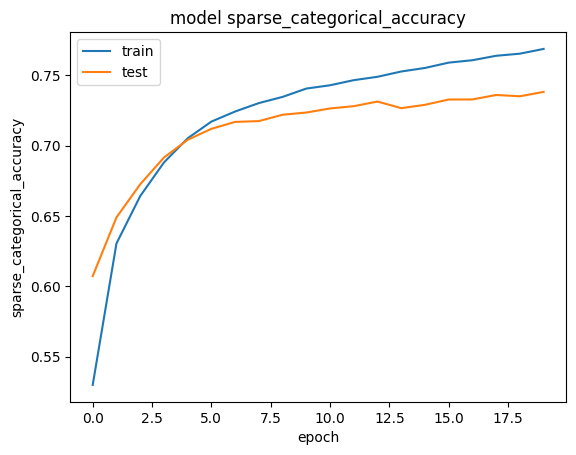

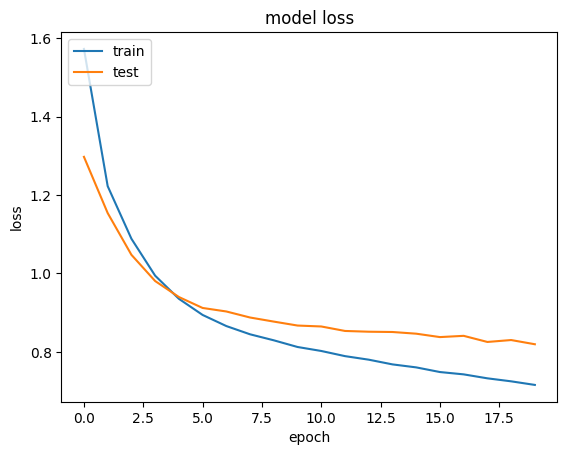

In [26]:
model = Sequential()
model.add(Input(shape=(784,)))  # Input layer
model.add(Reshape((28, 28, 1)))  # Reshaping layer
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

models(X_train, y_train, name = "Conv2D", add_data = 25000, epochs = 20, batch_size = 512)
    


Epoch 1/10
982/982 [==============================] - 7s 7ms/step - loss: 1.0434 - sparse_categorical_accuracy: 0.6508 - val_loss: 0.6307 - val_sparse_categorical_accuracy: 0.7819
Epoch 2/10
982/982 [==============================] - 6s 7ms/step - loss: 0.6400 - sparse_categorical_accuracy: 0.7881 - val_loss: 0.5032 - val_sparse_categorical_accuracy: 0.8311
Epoch 3/10
982/982 [==============================] - 6s 6ms/step - loss: 0.5417 - sparse_categorical_accuracy: 0.8223 - val_loss: 0.4883 - val_sparse_categorical_accuracy: 0.8349
Epoch 4/10
982/982 [==============================] - 6s 6ms/step - loss: 0.4648 - sparse_categorical_accuracy: 0.8497 - val_loss: 0.4141 - val_sparse_categorical_accuracy: 0.8709
Epoch 5/10
982/982 [==============================] - 8s 8ms/step - loss: 0.4087 - sparse_categorical_accuracy: 0.8673 - val_loss: 0.3577 - val_sparse_categorical_accuracy: 0.8876
Epoch 6/10
982/982 [==============================] - 8s 8ms/step - loss: 0.3655 - sparse_categorica

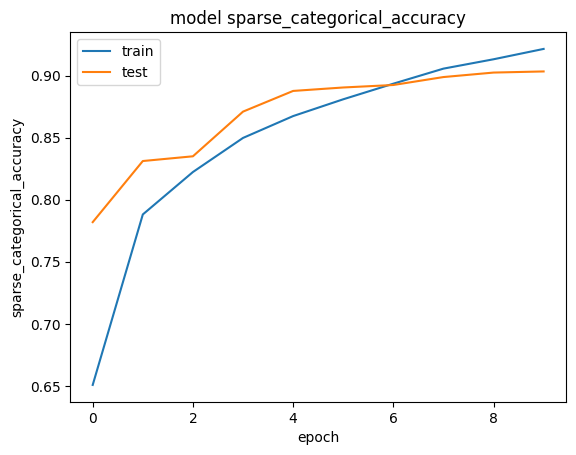

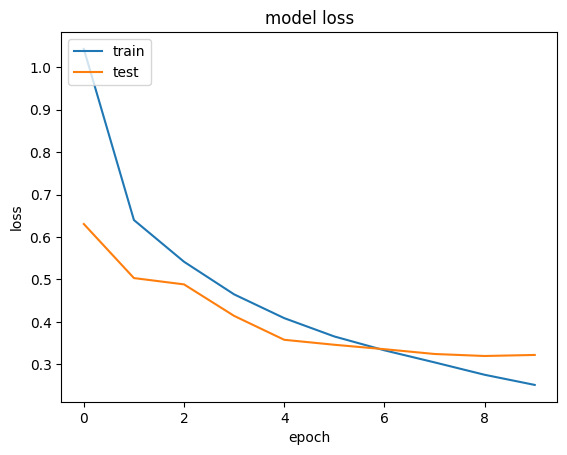

In [58]:
model = Sequential()
model.add(Input(shape=(784,)))  # Input layer
model.add(Reshape((28, 28, 1)))  # Reshaping layer
model.add(BatchNormalization(input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(64, (3,3), activation = 'relu', input_shape=(28, 28, 1)))
# model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1600, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

models(X_train, y_train, name = "Conv2D", add_data = 25000, epochs = 10, batch_size = 32)
    


In [55]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_26 (Reshape)        (None, 28, 28, 1)         0         
                                                                 
 batch_normalization_14 (Bat  (None, 28, 28, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_51 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 5, 5, 64)       

## 1 conv layer, 21000 data augmentation

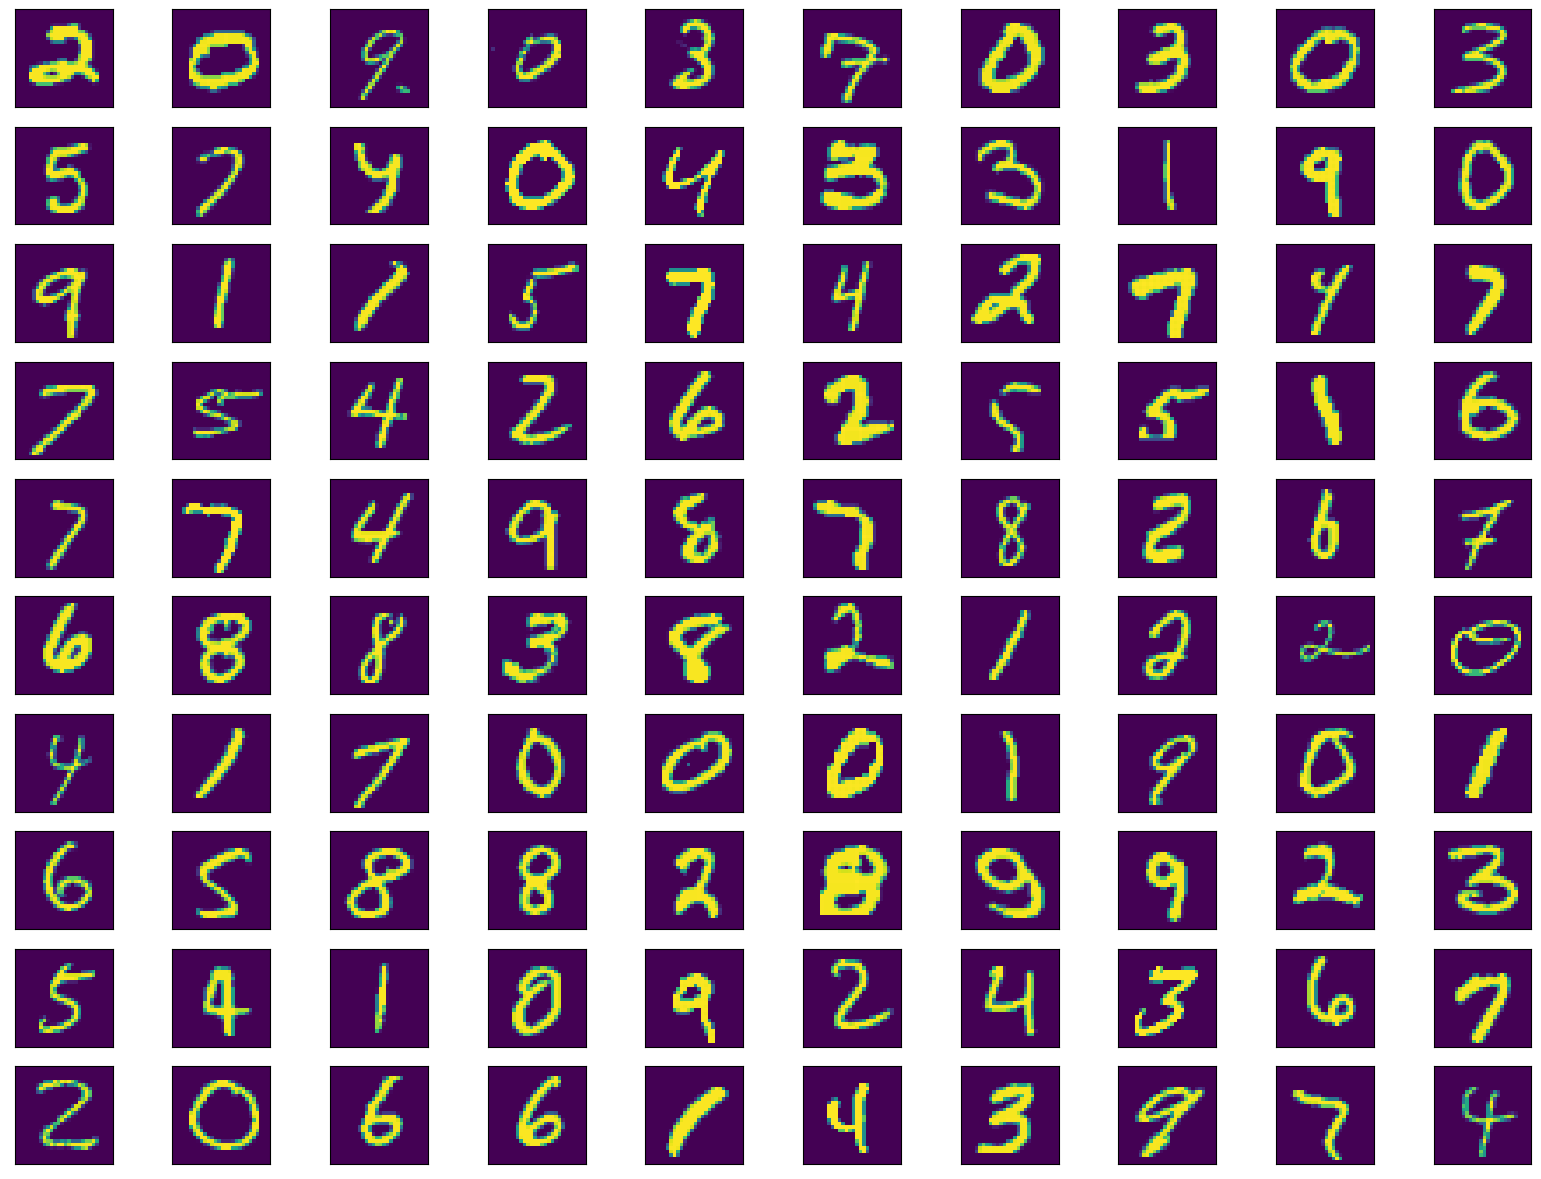

In [ ]:
fig, ax = plt.subplots(10, 10, figsize=(20, 15))
for i,ax in enumerate(ax.flat) :
    ax.imshow(test.loc[i].values.reshape(28,28))
    ax.set(xticks=[], yticks=[])

## 

Epoch 1/30


2023-08-30 16:00:29.407478: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-30 16:00:32.027055: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-30 16:00:32.323121: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-30 16:00:32.345916: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558efc17eeb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-30 16:00:32.345983: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-08-30 16:00:32.608952: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1232/1232 [==============================] - 19s 10ms/step - loss: 0.8827 - accuracy: 0.7117 - val_loss: 0.5944 - val_accuracy: 0.8046
Epoch 2/30
1232/1232 [==============================] - 12s 10ms/step - loss: 0.5752 - accuracy: 0.8105 - val_loss: 0.4764 - val_accuracy: 0.8431
Epoch 3/30
1232/1232 [==============================] - 12s 10ms/step - loss: 0.4822 - accuracy: 0.8408 - val_loss: 0.4255 - val_accuracy: 0.8585
Epoch 4/30
1232/1232 [==============================] - 12s 9ms/step - loss: 0.4294 - accuracy: 0.8576 - val_loss: 0.3923 - val_accuracy: 0.8705
Epoch 5/30
1232/1232 [==============================] - 11s 9ms/step - loss: 0.3931 - accuracy: 0.8685 - val_loss: 0.3872 - val_accuracy: 0.8711
Epoch 6/30
1232/1232 [==============================] - 12s 9ms/step - loss: 0.3595 - accuracy: 0.8811 - val_loss: 0.3628 - val_accuracy: 0.8825
Epoch 7/30
1232/1232 [==============================] - 12s 10ms/step - loss: 0.3377 - accuracy: 0.8884 - val_loss: 0.3600 - val_accuracy:

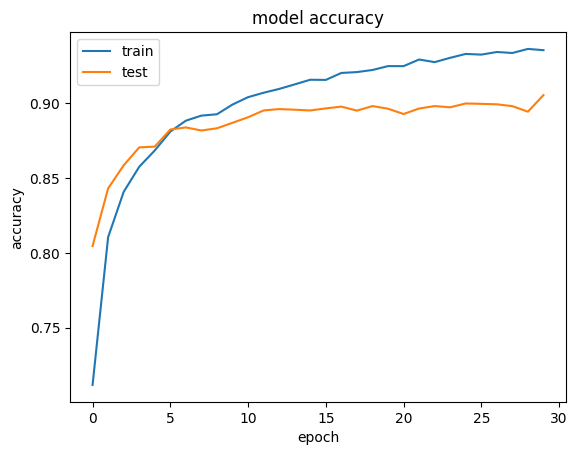

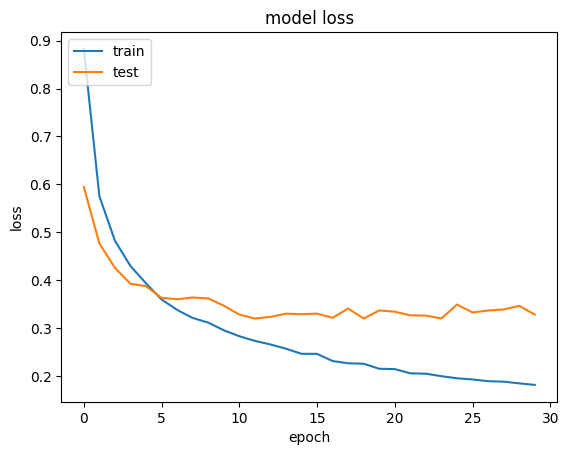

788/788 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2516
           1       0.98      0.98      0.98      2735
           2       0.85      0.83      0.84      2510
           3       0.86      0.91      0.88      2610
           4       0.89      0.90      0.89      2491
           5       0.82      0.84      0.83      2269
           6       0.91      0.90      0.91      2523
           7       0.90      0.89      0.90      2608
           8       0.95      0.93      0.94      2399
           9       0.91      0.90      0.91      2539

    accuracy                           0.91     25200
   macro avg       0.90      0.90      0.90     25200
weighted avg       0.91      0.91      0.91     25200



In [10]:
with device('/GPU:0'):

    # Reshape the input data to 4D tensor with shape (batch_size, rows, columns, channels)
    x_train = X_train.values.reshape(X_train.shape[0], 28, 28, 1)

    # Create a data generator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=90,      # randomly rotate the images by up to 10 degrees
        zoom_range=0.3,         # randomly zoom the images by up to 10%
        width_shift_range=0.1,  # randomly shift the images horizontally by up to 10%
        height_shift_range=0.1, # randomly shift the images vertically by up to 10%
        horizontal_flip=True,   # randomly flip the images horizontally
        vertical_flip=False,    # don't randomly flip the images vertically
        fill_mode='nearest'     # fill any empty pixels with the nearest value
    )

    # Fit the data generator to the training data
    datagen.fit(x_train)

    # Generate augmented data

    augmented_data = datagen.flow(x_train, y_train, batch_size= 42000)

    # Concatenate original and augmented data
    x_train_augmented = np.concatenate([x_train, augmented_data[0][0]], axis=0).reshape(84000,784)
    y_train_augmented = np.concatenate([y_train, augmented_data[0][1]], axis=0)


    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(x_train_augmented, y_train_augmented, test_size=.3, random_state=1)

    model = Sequential()
    # model.add(Input(784))
    model.add(BatchNormalization(input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3,3), activation = 'relu')) 
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64, (3,3), activation = 'relu')) 
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(loss = sparse_categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

    # Fit the model
    history = model.fit(x = X_train_split.reshape(58800,28,28,1), y = y_train_split, epochs=30, validation_split= 0.33,batch_size = 32 )

    # Save model
    #model.save("data/model_conv_ad_norm.h5")

    learning_curve_dl(history,"accuracy")

    y_pred = model.predict(X_test_split.reshape(25200,28,28))
    y_pred_classes = np.argmax(y_pred, axis = 1)
    y_true = y_test_split.astype(int).tolist() # Returns the indices of the maximum values along an axis.
    #confusion = confusion_matrix(y_true, y_pred_classes)
    print(classification_report(y_true, y_pred_classes))

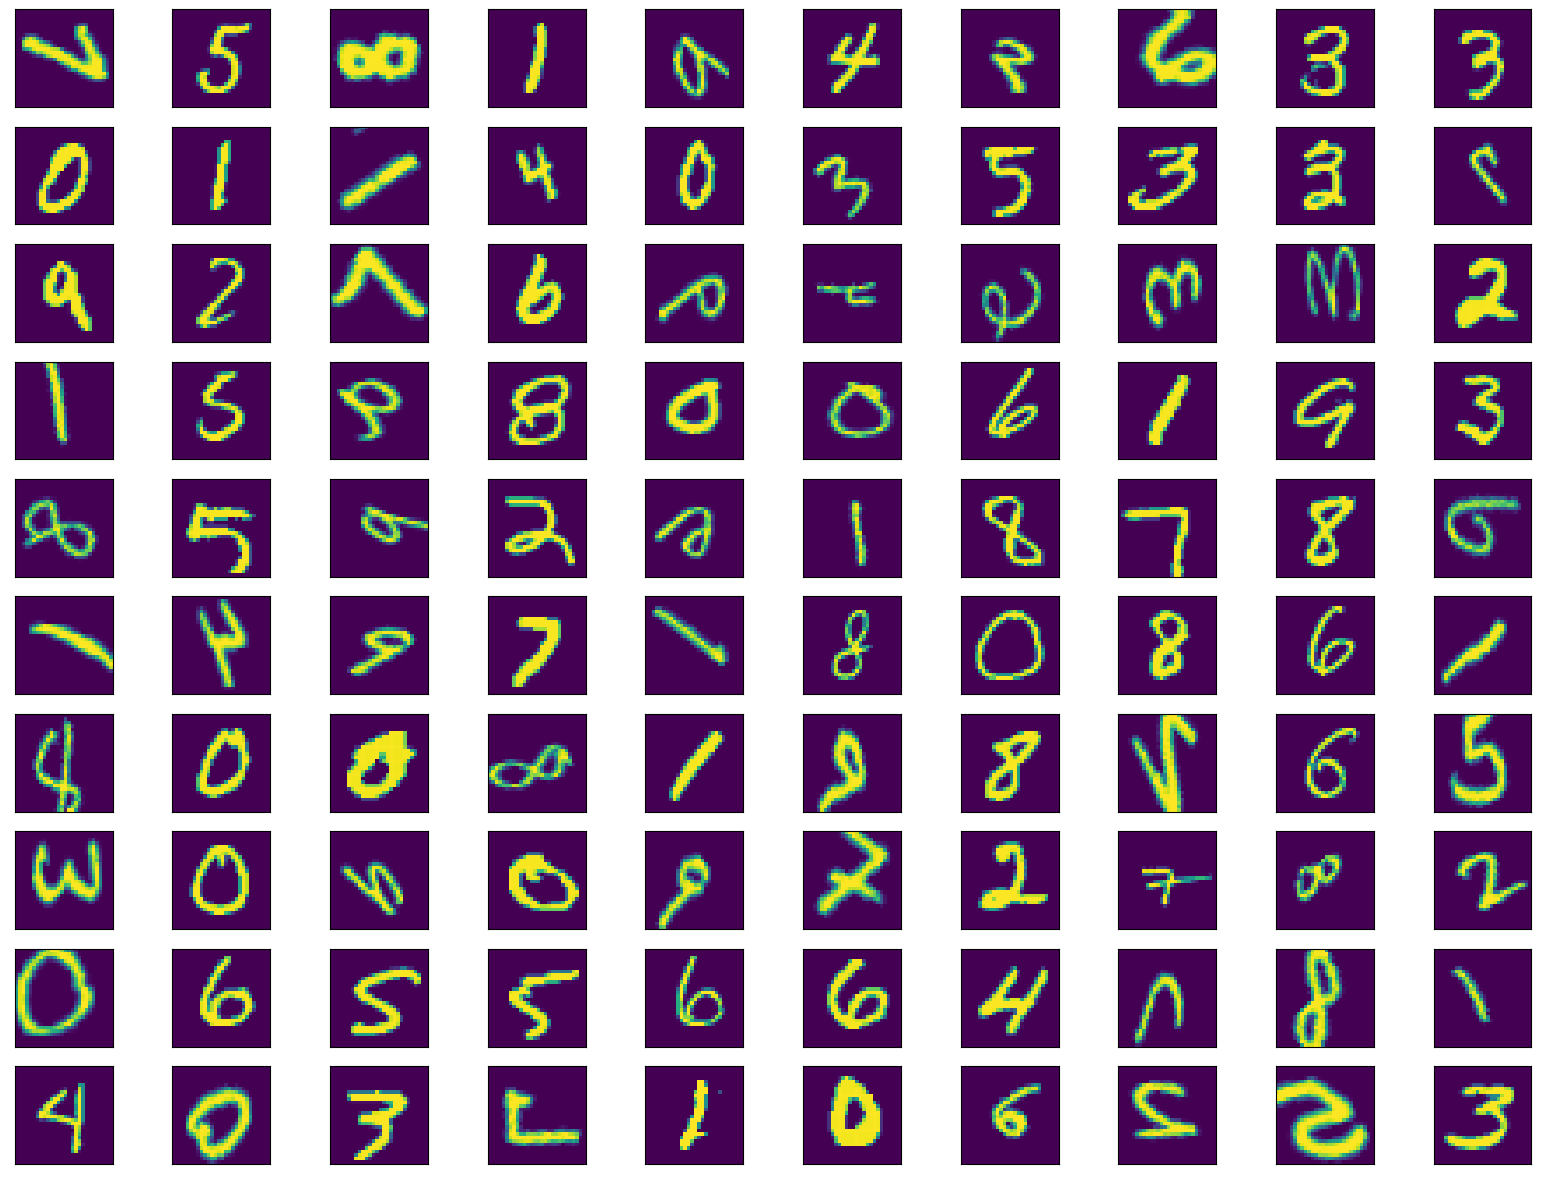

In [12]:
fig, ax = plt.subplots(10, 10, figsize=(20, 15))
for i,ax in enumerate(ax.flat) :
    ax.imshow(X_train_split[i].reshape(28,28))
    ax.set(xticks=[], yticks=[])

In [15]:
from tensorflow.keras.models import load_model

model = load_model("data/model_conv_ad_norm.h5")